# Project: "No-Show Appointments" Dataset Analysis 

## Table of Contents
<ul>
<li><a href="#intro">1 Introduction</a></li>   
<li><a href="#wrangling">2 Data Wrangling</a></li>
    <ul>
        <li><a href = "#Data_Gathering">2.1 Data Gathering</a> </li>
        <li><a href = "#Data_Assessing">2.2 Data Assessing</a> </li>
        <ul>
            <li> <a href = "#Data_Assessing_summary">2.2.1 Data Assessing Summary</a> </li>
        </ul>
        <li><a href = "#Data_cleaning">2.3 Data Cleaning</a> </li>
    </ul>
<li><a href="#eda">3 Exploratory Data Analysis</a></li>
    <ul>
        <li><a href = "#var_1">3.1 Gender Effect</a> </li>
        <li><a href = "#var_2">3.2 Brasilian Program Enrollment Effect</a> </li>
        <li><a href = "#var_3">3.3 Hypertension Effect</a> </li>
        <li><a href = "#var_4">3.4 Diabetes Effect</a> </li>
        <li><a href = "#var_5">3.5 Alcoholism Effect</a> </li>
        <li><a href = "#var_6">3.6 Reminder SMS Effect</a> </li>
        <li><a href = "#var_7">3.7 Handicap Degree Effect</a> </li>
        <li><a href = "#var_8">3.8 Neighbourhood Effect</a> </li>
        <li><a href = "#var_9">3.9 Age Effect</a> </li>
        <li><a href = "#var_10">3.10 Wait Period Effect</a> </li>
    </ul>
<li><a href="#conclusions">4 Conclusions</a></li>
</ul>

In [1]:
%%html
<style> 
table {float:left} 
</style>

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
from matplotlib import rcParams
warnings.simplefilter('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth', -1)


<a id='intro'></a>
## 1 Introduction

This report describes the process of the no-show appointment medical dataset analysis. The dataset is downloaded from `Kaggle`. The Inspection of dataset on a spreadsheet application shows that it contains `14` columns and `110527` records. The following table summarizes the variable in this dataset.

| Field Name | Description |
|:- | :- |
| `PatientId` | contains the id of each patient |
| `AppointmentID` | contains the id of the appointment itself |
|`Gender1`|indicates the gender of patient `(M)ale` or `(F)emale`|
|`ScheduledDay`| contains the date at which the appointment date was determined |
|`AppointmentDay`| contains the date at which the appointment will occur |
|`Age`|patient age|
|`Neighbourhood`|appointment location|
|`Scholarship`| indicates whether or not the patient is enrolled in Brasilian welfare program|
|`Hipertension`|indicates whether or not the patient has a hypertension|
|`Diabetes`|indicates whether or not the patient has diabetes|
|`Alcoholism`|indicates whether or not the patient drinks alcohol products|
|`Handcap`|an integer varying from 0 to 4 showing degree of handicap|
|`SMS_received`|indicates whether or not a reminder SMS was sent to the patient|
|`No-show`|indicates whether or not the patient missed his/her appointment|

The analysis is based on using this data to determine `which features can be used to predict whether or not the patient will miss his/her appointment`. Thus, the dependent variable here will be the absence or presence of the patient. The independent variable that will be considered:<br>
- Gender
- Interval between the appointment setting date and the actual appointment date 
- Age
- Hospital location
- Brasilian program enrollment
- Hypertension presence
- Diabetes presence
- Alcoholism
- Handicap degree
- Reminder SMS receival <br>

The distribution of each variable in the dataset will be first investigated. Then, the relationship between each variable and the absence ratio will be investigated. 

<a id='wrangling'></a>
## 2 Data Wrangling

<a id = 'Data_Gathering' ></a>
### 2.1 Data Gathering
As previously mentioned, the data was downloaded manually from <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv">Kaggle</a>. The data is provided in `.csv` format and `Pandas` dataframe will be used to import it to `jupyter notebook`.

In [3]:
#load the data into a pandas dataframe structure
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id = 'Data_Assessing' ></a>
### 2.2 Data Assessing
in this step, the dataset is inspected for both data quality and data tidiness issues. All data issues discovered will be summarized in the end of this section

In [4]:
#inspecting first five records
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#inspecting last five records
df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
#summary of all data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This summary shows that all columns don't have any null values. the dataset has 14 columns with 110527 entries. Some data quality issues can be spotted. `PatientId` and `AppointmentID` should be of `str` data type not integer nor float. `ScheduledDay` and `AppointmentDay` has `str` data type where they should be `datetime` objects.<br>
Some column name need to be modified to be more representative, i.e. `Hipertension`, `Handcap` and `No_show` 

In [7]:
#check for duplicated records
df.duplicated().sum()

0

No duplicated entries found in the dataframe

In [8]:
#check for duplicated appointment 
df['AppointmentID'].duplicated().sum()

0

No duplicated appointments were discovered

In [9]:
#check for patients with more than one appointment
df['PatientId'].duplicated().sum()

48228

There are 48228 duplicated patients with two or more unique appointment. This is an interesting information, as it could be used to inspect the effect of the order of the appointment (being the first, second, etc.) on the absence ratio. 

In [10]:
freq_patient = df[df['PatientId'].duplicated()]['PatientId'].value_counts()

In [11]:
#Statistically assess the dataset 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


All data columns show reasonable values, taking into consideration that `PatientId` and `AppointmentID` has wrong data type, except for `Age` column where there is a minimum value of -1. this has to be investigated 

In [12]:
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is one record of a value less than zero. This entry need to be deleted.<br> As per anticipated analysis, the dataset is considered tidy. Thus, No further issues can be highlighted. 

<a id = 'Data_Assessing_summary' ></a>
#### 2.2.1 Data Assessing Summary

| Column id | Data Issue Type | Issue Description |
|:- | :- | :- |
|`PatientId`|quality|should be of `str` data type not `int64`|
|`AppointmentID`|quality|should be of `str` data type not `float64`|
|`ScheduledDay`|quality|should be of `datetime` data type not `str`|
|`AppointmentDay` |quality|should be of `datetime` data type not `str`|
|`Hipertension` |quality|column name is not representative, has a typo|
|`Handcap` |quality|column name is not representative, has a typo|
|`No_show` |quality|column name is not clear enough alongside with the encoding used in the values|
|`Age` |quality|column has negative age value|

<a id = 'Data_cleaning' ></a>
### 2.3 Data Cleaning
The issues discovered in the last subtitle will now be cleaned so the data can be considered ready for analysis. The cleaning process must start with copying the dataframe.

In [13]:
df_clean = df.copy()

Applying `.rename()` method we will change the column names to more representative names

In [14]:
#change column names to more representative form
df_clean = df_clean.rename(columns = {'AppointmentID':'AppointmentId',
                      'Hipertension':'Hypertension',
                     'Handcap':'Handicap',
                     'No-show':'Absence'})
#Test the code to check column names
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentId   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  Absence         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Applying `.astype()` method, the column data types of `PatientId` and `AppointmentId` will be set to `str`

In [15]:
#code
df_clean['PatientId']=df_clean['PatientId'].astype('str')
df_clean['AppointmentId'] = df_clean['AppointmentId'].astype('str')
#Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  object
 1   AppointmentId   110527 non-null  object
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hypertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handicap        110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  Absence         110527 non-null  object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


The next step is to convert the `ScheduledDay` and `AppointmentDay` to timestamp using `.to_datetime()` method

In [16]:
#code
df_clean['ScheduledDay']=pd.to_datetime(df_clean['ScheduledDay'])
df_clean['AppointmentDay'] = pd.to_datetime(df_clean['AppointmentDay'])
#Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentId   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  Absence       

The next step is to introduce a new variable in the dataframe as it will be used in the analysis as discussed in the introduction. This column will be calculated by subtracting the `AppointmentDay` from `ScheduledDay` and cast this as days. But, first we will extract the date only from the timestamp. Then, we will calculate the `WaitPeriod` by subracting the two dates.

In [17]:
#code
df_clean['ScheduledDay']=df_clean['ScheduledDay'].apply(lambda x:x.date())
df_clean['AppointmentDay']=df_clean['AppointmentDay'].apply(lambda x:x.date())
df_clean['WaitPeriod'] = (df_clean['AppointmentDay']-df_clean['ScheduledDay']).apply(lambda x: x.days)
#Test
df_clean.head(5)

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence,WaitPeriod
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


As a new numerical variable is introduced it will be statistically checked to verify it is clear of any errors

In [18]:
df_clean['WaitPeriod'].describe()

count    110527.000000
mean     10.183702    
std      15.254996    
min     -6.000000     
25%      0.000000     
50%      4.000000     
75%      15.000000    
max      179.000000   
Name: WaitPeriod, dtype: float64

The records shows appointment with negative `WaitPeriod`, as if the appointment was set to a date earlier than the scheduling date. This is not logic and need further investigation. Also, `WaitPeriod` That is extremely long is suspicious. A series will be created with all suspicious `WaitPeriod` values and their frequency. The suspicious entries will be considered as entries with `WaitPeriod` values less than zero and more than 100 days.

In [19]:
df_clean['WaitPeriod'].value_counts().iloc[(df_clean['WaitPeriod'].value_counts().index<0)|(df_clean['WaitPeriod'].value_counts().index>100)]

 176    16
 162    11
 133    11
 179    10
 155    10
 169    8 
 142    8 
 104    8 
 111    5 
 112    5 
 103    5 
 109    5 
 108    5 
 102    4 
-1      4 
 105    4 
 119    4 
 122    3 
 115    2 
 110    2 
 107    2 
 123    1 
 101    1 
 126    1 
 125    1 
 139    1 
 151    1 
 132    1 
 117    1 
 146    1 
-6      1 
 127    1 
Name: WaitPeriod, dtype: int64

Now, it is more obvious that 4 enteris with -1 `WaitPeriod` and one entry with `WaitPeriod` -6. Alot of entries has high valus of `WaitPeriod` we will inspect the entries with the maximum value 179.

In [20]:
suspicious_list = [-1,-6,179]
df_clean[df_clean['WaitPeriod'].apply(lambda x:x in suspicious_list)]

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence,WaitPeriod
27033,7839272661752.0,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868.0,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979.0,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,998231581612122.0,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821.0,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1
102786,454287126844.0,5134227,M,2015-12-07,2016-06-03,67,MARUÍPE,0,1,1,0,0,0,No,179
102788,254755473188837.0,5134249,F,2015-12-07,2016-06-03,63,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179
102789,31123415579473.0,5134239,F,2015-12-07,2016-06-03,60,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179
102790,996534792394327.0,5134243,M,2015-12-07,2016-06-03,73,MARUÍPE,0,1,1,0,0,0,No,179
102791,941625887116382.0,5134228,F,2015-12-07,2016-06-03,77,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,179


The `WaitPeriod` of negative value has to be eliminated. Inspecting the entry of the maximum value, it shows that there is nothing wrong with it. This entry might be related to an appointment of a surgery that takes alot of preparations. Thus, all high waiting interval will be considered valid.

In [21]:
#Code 
df_clean = df_clean[df_clean['WaitPeriod']>=0]

#Test
df_clean[df_clean['WaitPeriod']<0]

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence,WaitPeriod


The next step is to remove the entry with value in`Age` column with negative entry

In [22]:
#code
df_clean = df_clean[df_clean.Age >=0 ]
#Test
df_clean[df_clean['Age']<0]

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence,WaitPeriod


The last step of this step will consider replacing the encoding in the `Absence` column with 1/0 encoding for ease of calculation in the following analysis

In [23]:
#Code
def bool_encoding(x):
    if x == 'Yes':
        return 1
    else:
        return 0
df_clean['Absence'] = df_clean['Absence'].apply(bool_encoding)
#Test
df_clean['Absence'].describe()

count    110521.000000
mean     0.201898     
std      0.401419     
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      0.000000     
max      1.000000     
Name: Absence, dtype: float64

<a id='eda'></a>
## 3 Exploratory Data Analysis
The core question is which factor should be considered for prediction of patient absence. The overall absence ratio should be first evaluated to initiate a reference for comparing effect of different independent variables.

In [24]:
df_clean['Absence'].value_counts(normalize=True)

0    0.798102
1    0.201898
Name: Absence, dtype: float64

From the previous result, we can consider the overall absence ratio is 0.2 or 20% of all patient would miss their appointment. Thus, the absent patients represent the less fimilar class in a skewed classes categorical variable. in the next section, the effect of the independent variables shown in the introduction on the absence ratio will be investigated 

<a id='var_1'></a>
### 3.1 Gender Effect

In [25]:
df_clean['Gender'].value_counts(normalize=True)

F    0.649976
M    0.350024
Name: Gender, dtype: float64

The gender data shows that around 35% of the patients are males while the female occupies 65% of the data. The methodology, that will be followed to show the gender effect, dependes on comparing absence ratio for both males and females with the overall ratio. As the number of males and females are not equal, the visualization used should show also the total percent of each category with respect to the entire dataset. To do that, a stacked bar chart will be used.<br>
Each category value in the categorical independent variable, e.g. Gender, will represent a bar in the chart. The bar height will be the ratio of this category with respect to the entire dataset. Each bar, representing a category, will be divided into two pieces to represent the absent and present patient ratios with respect to the entire dataset within this category.<br>
The abscence ratio within the category will be calculated and added as a label above the category bar. As this methodology will be repeated for all categorical independent variables, a function will be created to plot this visualization with all required formating to be used later for findings communication.

First, new values will be assigned to `Gender` column. `Male` and `Female` entries will replace `M` and `F` respectively.

In [26]:
def new_cat_gender(gender):
    if gender == 'M':
        return "Male"
    elif gender == 'F':
        return "Female"
    
df_clean['Gender_cat'] = df_clean['Gender'].apply(new_cat_gender)

The next step is to create a function to be used for all the analysis of categorical independent variables. This function will perform the analysis illusrtated above. It will show the fraction of total patient in each category in a stacked bar chart. Each piece of category bar will represent absent and non-absent patients as fraction of total number of patients. A label will be added to each category to represent the absence ratio inside the category rounded to two decimal values.

In [27]:
def hassan_count (category_label,df):
    values = df[category_label].value_counts().values
    return values
    
def hassan_chart(category_label,df,w,s,text_size,x_label,y_label,plot_title):
    categories = list(df[category_label].value_counts().index)
    total = len(df.index)
    df1 = df[df['Absence']==0]
    df2 = df[df['Absence']==1]
    not_absent = hassan_count(category_label,df1)
    absent = hassan_count(category_label,df2)
    not_absent_patients= list(not_absent/total)
    absent_patients = list(absent/total)
    value = list(hassan_count(category_label,df)/total)
    absence_ratio = list((absent/(absent+not_absent)).round(2))
    data_label = []
    for ratio in absence_ratio:
        data_label.append('Absence Fraction= {0}'.format(ratio))
    
    rcParams['figure.figsize']=14,8
    plt.bar(categories,absent_patients,w,label='Absent',color = 'red',alpha = 0.75)
    plt.bar(categories,not_absent_patients,w,bottom=absent_patients,label='Not absent',color = 'blue',alpha = 0.75)
    n = len(categories)
    for a in range(n):
        plt.text((a+s-w),value[a]+0.005,data_label[a],fontsize = text_size)
    plt.legend()
    plt.minorticks_on()
    plt.grid(which = 'both',axis = 'y',linestyle = '--',linewidth = 0.5)
    plt.xlabel(x_label,fontsize = 'large')
    plt.ylabel(y_label,fontsize = 'large')
    plt.title(plot_title,fontsize = 'large');

Let us apply this function for the `Gender` variable with the two new categories `Female` and `Male`

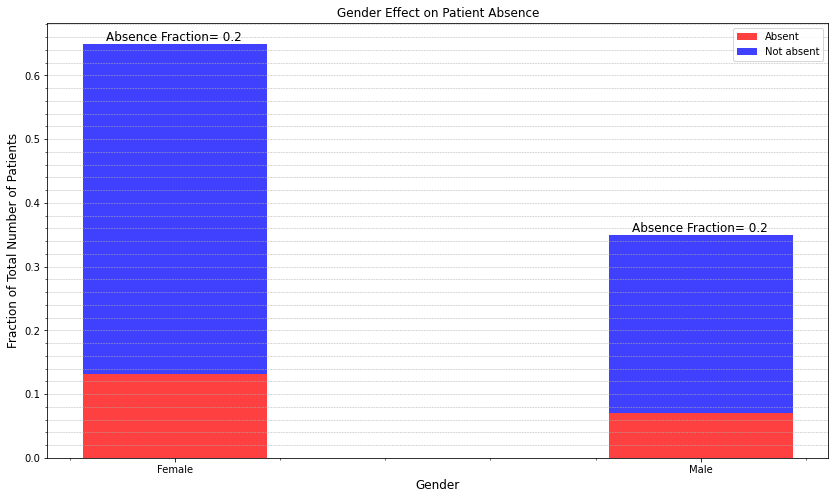

In [28]:
hassan_chart('Gender_cat',df_clean,0.35,0.22,'large','Gender','Fraction of Total Number of Patients',
             'Gender Effect on Patient Absence')


From this chart, it is obvious that the fraction of female patients is higher than the fraction of male patients. The fraction of absent female patients is more than the fraction of absent male. To check the effect of the gender category on the absence ratio, the absence ratio is calculated for each category. Thus, the absence ratio of female category is the calcualted as the number of absent female patients to the total number of female patients. It is obvious that the absence ratio for male and female are the same and equal to the overall absence ratio. Considering this finding, we can conclude that Gender change has no effect on the absence ratio and should not be considered in predicting absence probability.

<a id='var_2'></a>
### 3.2 Brasilian Program Enrollment Effect

The effect of the enrollement on the absence ratio will be investigated. The values in the dataframe will be changed to `enrolled` and `excluded` for 1 and 0 respectively.

In [29]:
def new_cat_scholarship(status):
    if status == 0:
        return "excluded"
    elif status == 1:
        return "enrolled"
    else:
        return status

df_clean['Scholarship_cat'] = df_clean['Scholarship'].apply(new_cat_scholarship)
df_clean['Scholarship_cat'].value_counts(normalize = True)

excluded    0.901729
enrolled    0.098271
Name: Scholarship_cat, dtype: float64

More than 90% of patients in this data set are not enrolled in the welfare program. The bar plot will be created and the result will be evaluated in the next two cells

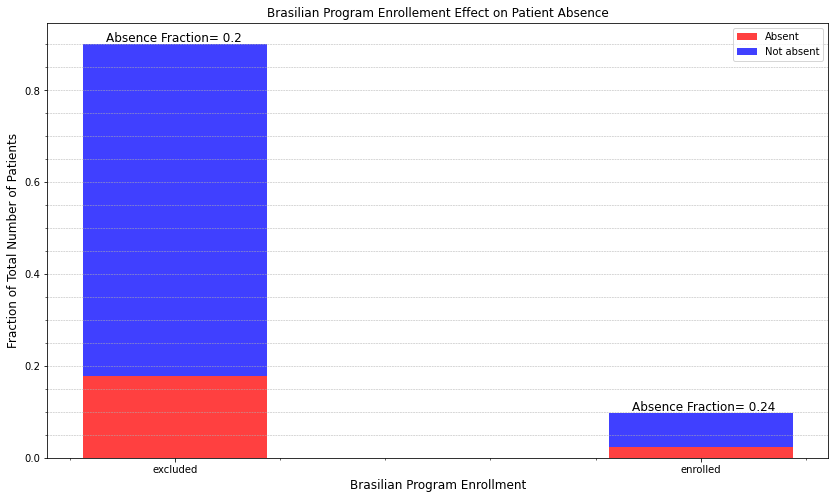

In [30]:
hassan_chart('Scholarship_cat',df_clean,0.35,0.22,'large','Brasilian Program Enrollment','Fraction of Total Number of Patients',
             'Brasilian Program Enrollement Effect on Patient Absence')


It is shown here that the absence fraction  increased by 0.04 for the patients that are enrolled in the welfare programme compared with patients who are not enrolled. The patients that are not enrolled showed the same overall absence fraction. Thus, brasilian program enrollment can be used for predicting absence chance.

<a id='var_3'></a>
### 3.3 Hypertension Effect

First, the fraction of patients that has hypertension is calculated for the entire dataset 

In [31]:
df_clean['Hypertension'].value_counts(normalize = True)

0    0.802743
1    0.197257
Name: Hypertension, dtype: float64

The dataset has a fraction of nearly 0.2 of the total patients that were diagnosed with hypertension. Then, a new value pairs is used to describe the diagnosis of hypertension. the 1 and 0 pairs are replaced with positive and negative 

In [32]:
def new_cat_hypertension(status):
    if status == 0:
        return "negative"
    elif status == 1:
        return "positive"
    else:
        return status
df_clean['Hypertension_cat'] = df_clean['Hypertension'].apply(new_cat_hypertension)
df_clean['Hypertension_cat'].value_counts(normalize = True)

negative    0.802743
positive    0.197257
Name: Hypertension_cat, dtype: float64

The same analysis will be performed and the same bar chart will be plotted for the `Hypertension` variable.

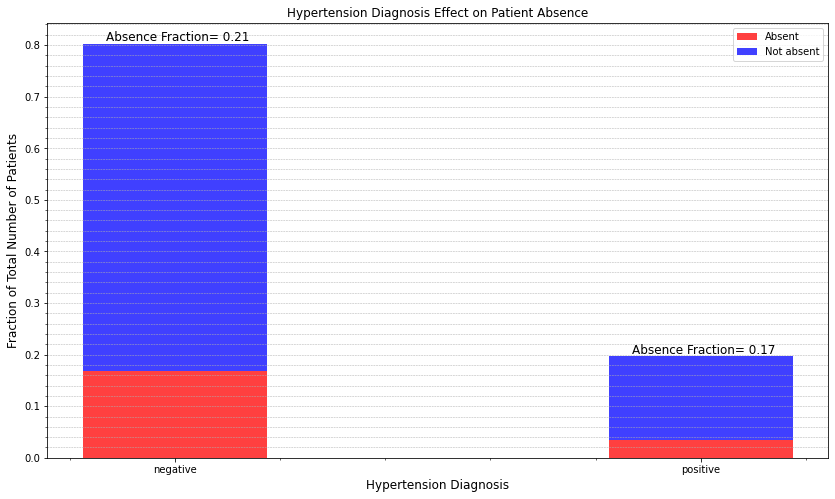

In [33]:
hassan_chart('Hypertension_cat',df_clean,0.35,0.22,'large','Hypertension Diagnosis','Fraction of Total Number of Patients',
             'Hypertension Diagnosis Effect on Patient Absence')

The findings of this analysis indicated that the number of the patients with hypertension is much smaller (0.2 of total patients) than the patients who weren't diagnosed with it. The absence ratio of patients with hypertension is less than the overall absence ratio by 0.03 while the absence ratio of patients with no hypertension is slightly higher than the overall absence ratio. Thus, hypertension diagnosis can be used as a factor to predict absence chance.

<a id='var_4'></a>
### 3.4 Diabetes Effect
The same procedure will be followed for diabetes diagnosis.

In [34]:
def new_cat_diabetes(status):
    if status == 0:
        return "negative"
    elif status == 1:
        return "positive"
    else:
        return status
df_clean['Diabetes_cat'] = df_clean['Diabetes'].apply(new_cat_diabetes)
df_clean['Diabetes_cat'].value_counts(normalize = True)

negative    0.928131
positive    0.071869
Name: Diabetes_cat, dtype: float64

The number of patients with diabetes in this data set represent a fraction of nearly 0.07. The same plot will be created and its results will be investigated.

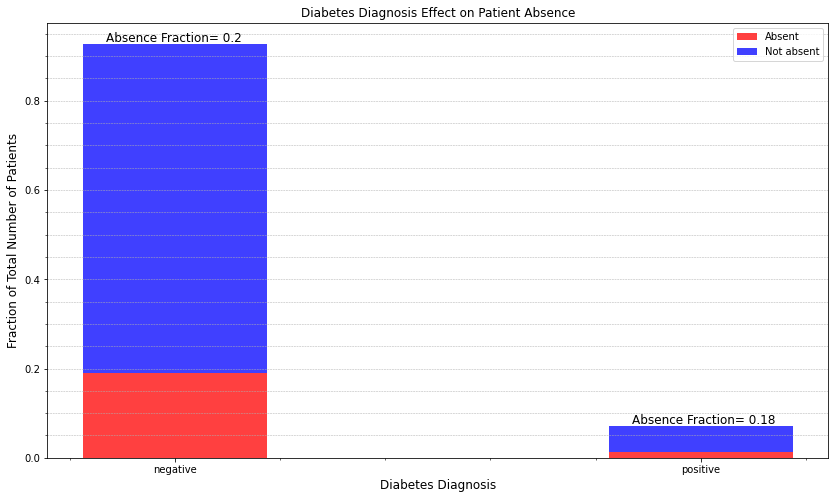

In [35]:
hassan_chart('Diabetes_cat',df_clean,0.35,0.22,'large','Diabetes Diagnosis','Fraction of Total Number of Patients',
             'Diabetes Diagnosis Effect on Patient Absence')

The diabetes diagnosis as positive will reduce the absence fraction of 0.02. Thus, diagnosis of diabetes can be used as a factor for predicting the chance of patient absence.

<a id='var_5'></a>
### 3.5 Alcoholism Effect
The same procedure will be followed for effect of alcohol drinking.

In [36]:
def new_cat_alcohol(status):
    if status == 0:
        return "No"
    elif status == 1:
        return "Yes"
    else:
        return status
df_clean['Alcoholism_cat'] = df_clean['Alcoholism'].apply(new_cat_alcohol)
df_clean['Alcoholism_cat'].value_counts(normalize = True)

No     0.969599
Yes    0.030401
Name: Alcoholism_cat, dtype: float64

More than 0.97 of all patients don't drink alcohol products.

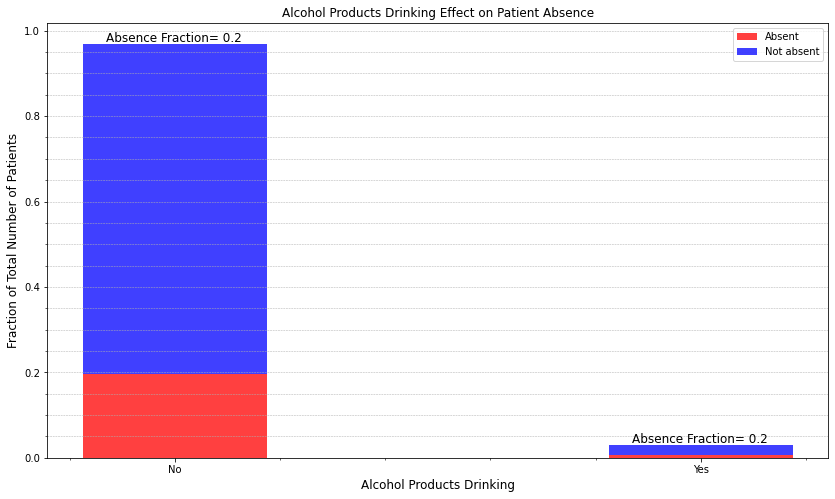

In [37]:
hassan_chart('Alcoholism_cat',df_clean,0.35,0.22,'large','Alcohol Products Drinking','Fraction of Total Number of Patients',
             'Alcohol Products Drinking Effect on Patient Absence')

The absence ratio of people who drink and don't drink are the same and they are equal to the overall absence ratio. Thus, alcoholism will not be considered a useful factor.

<a id='var_6'></a>
### 3.6 Reminder SMS Effect
The same procedure will be followed for effect of receival of reminder SMS on the absence ratio

In [38]:
def new_cat_sms(status):
    if status == 0:
        return "No"
    elif status == 1:
        return "Yes"
    else:
        return status
df_clean['SMS_received_cat'] = df_clean['SMS_received'].apply(new_cat_sms)
df_clean['SMS_received_cat'].value_counts(normalize = True)

No     0.678957
Yes    0.321043
Name: SMS_received_cat, dtype: float64

About 0.32 of all the patients received a reminder SMS prior to their appoitment. Now, the same analysis will be repeated to calculate the absence ratio per each category.

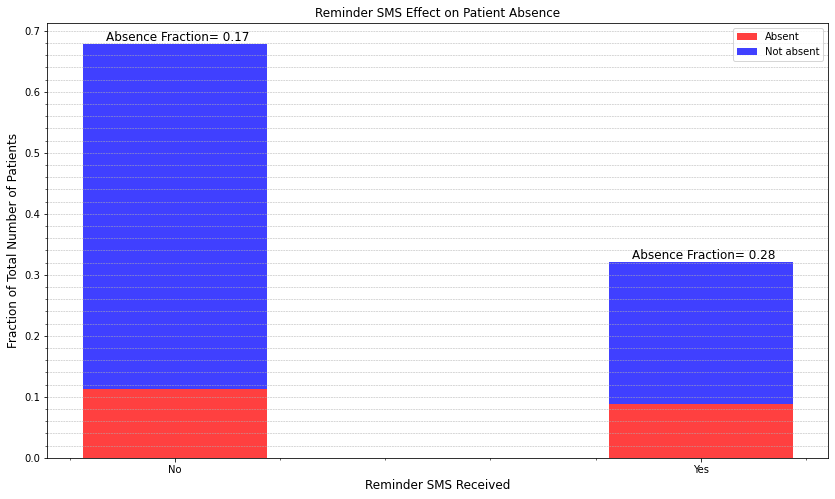

In [39]:
hassan_chart('SMS_received_cat',df_clean,0.35,0.22,'large','Reminder SMS Received','Fraction of Total Number of Patients',
             'Reminder SMS Effect on Patient Absence')

The absence fraction of patients who didn't receive a reminder is less than the overall fraction by approximately 0.03. While the people who receive a reminder shows a significant increase in absence ratio by 0.08. This correlation doesn't imply causation as it is not logic that people with reminder messages are more likely to miss their appointment. They can be a interrelation between SMS receival and other parameter or parameters. This relationship may cause this observed correlation. For now, the `SMS_received` variable can be considered a factor in predicting the absence chance.

<a id='var_7'></a>
### 3.7 Handicap Degree Effect
The data set shows 5 different level of handicap. Zero represent no Handicap. From 1 to 4, the value represents the degree of Handicap

In [40]:
df_clean['Handicap'].value_counts(normalize = True)

0    0.979741
1    0.018458
2    0.001656
3    0.000118
4    0.000027
Name: Handicap, dtype: float64

More than 0.97 of all patients don't suffer any degree of Handicap. The effect of the degree on the absence fraction will be investigated using the same previous function. But a new column will be created will more clear category values

In [41]:
def new_cat_cap(status):
    if status == 0:
        return "No Handicap"
    elif status == 1:
        return "Level 1"
    elif status == 2:
        return "Level 2"
    elif status == 3:
        return "Level 3"
    elif status == 4:
        return "Level 4"
    else:
        return status
df_clean['Handicap_cat'] = df_clean['Handicap'].apply(new_cat_cap)
df_clean['Handicap_cat'].value_counts(normalize = True)

No Handicap    0.979741
Level 1        0.018458
Level 2        0.001656
Level 3        0.000118
Level 4        0.000027
Name: Handicap_cat, dtype: float64

The same chart will be plotted with each bar represent a handicap level with data label of absence fraction.

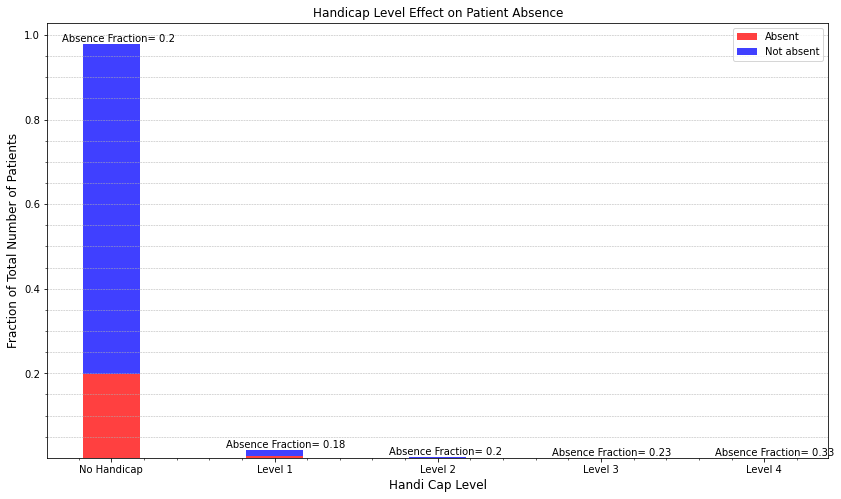

In [42]:
hassan_chart('Handicap_cat',df_clean,0.35,0.05,'medium','Handi Cap Level','Fraction of Total Number of Patients',
             'Handicap Level Effect on Patient Absence')

Despite the fact that the patients will handicap level are not well represented in the data set(small number of entries), increasing the level of handicap causes the absence fraction to increase over the overall absence fraction. Thus, Handicap level can be used as a factor for predicting chance of patient absence.

<a id='var_8'></a>
### 3.8 Neighbourhood Effect
The distribution of different neighbourhood is first investigated using a bar plot representing the fraction of patients per each place

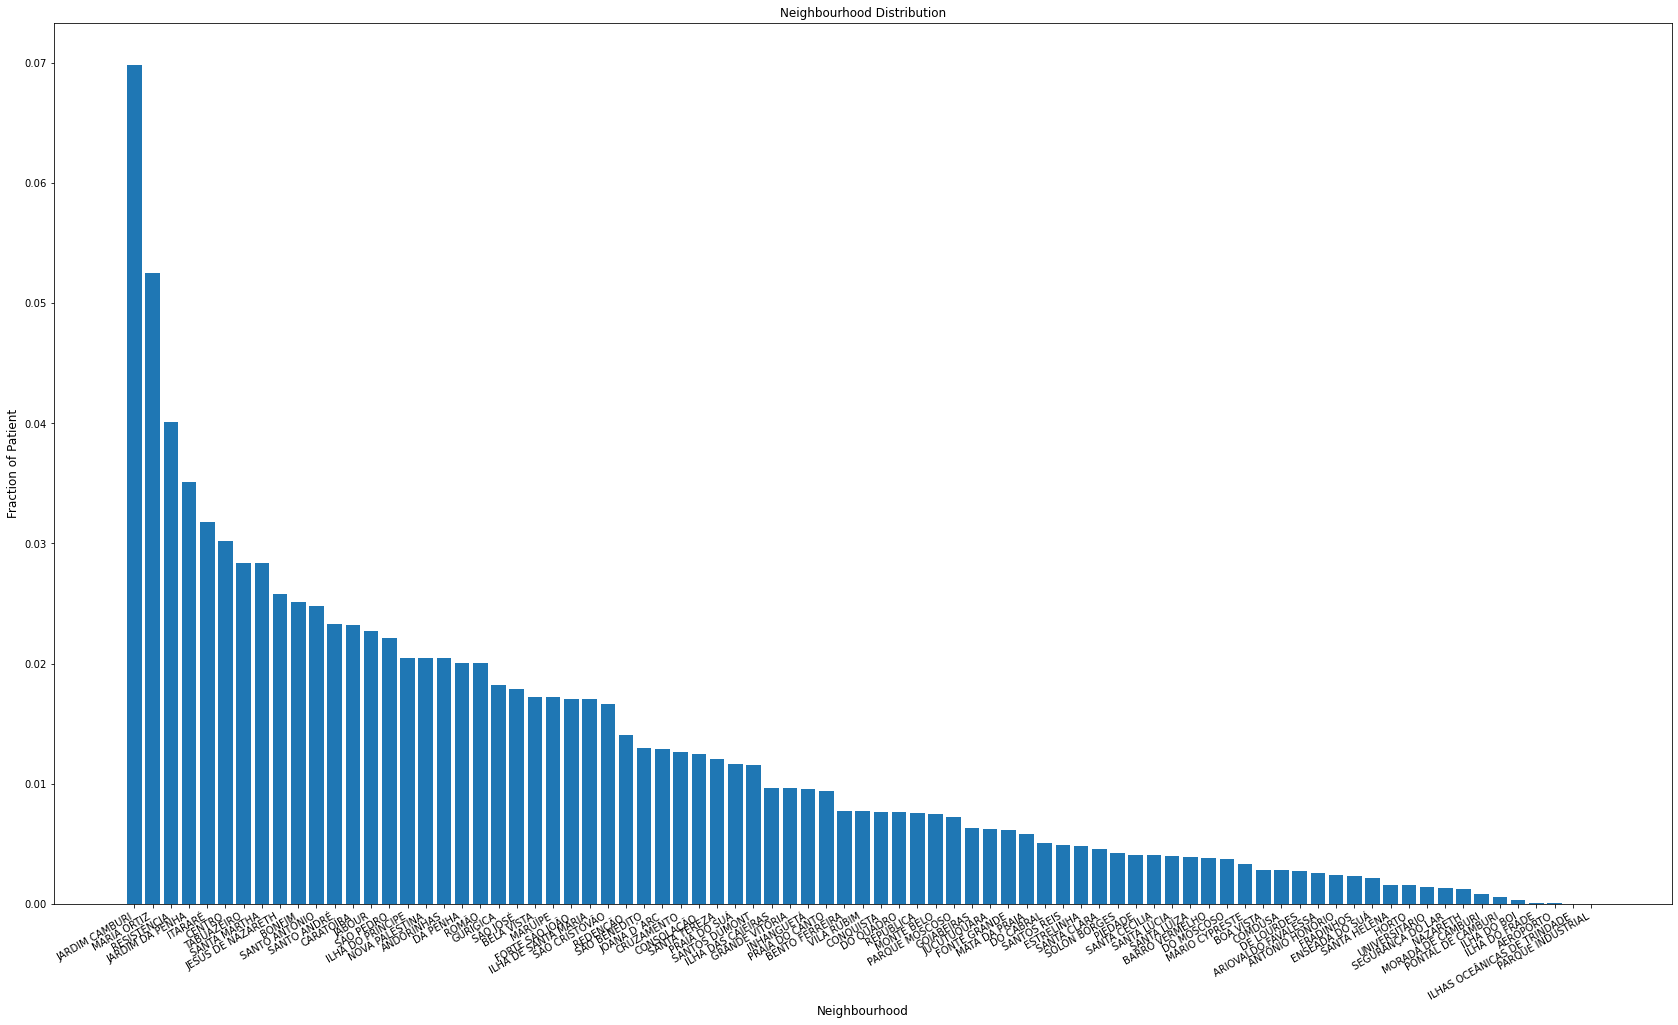

In [43]:
area_distribution = df_clean['Neighbourhood'].value_counts(normalize=True)
x = list(area_distribution.index)
y = list(area_distribution.values)

rcParams['figure.figsize']=29,18
plt.bar(x,y)
plt.xticks(ticks =[x for x in range(len(x))] ,label = x,fontsize = 'medium')
plt.gcf().autofmt_xdate()
plt.xlabel('Neighbourhood',fontsize = 'large')
plt.ylabel('Fraction of Patient',fontsize = 'large')
plt.title('Neighbourhood Distribution',fontsize = 'large');

They are 81 different locations. `JARDIM CAMBURI` is the place to where the most fraction of the patients has their appointment assigned. `hassan_chart` will not be very useful here due to increased number of categories (hospital locations). The absence ratio for each location will be plotted agaisnt the location as a line chart. A new dataframe is created using `groupby` function. The dataframe has two columns first column is the neighbourhood and the second column is the absence fraction. Absence fraction is calculated using the mean of the `Absence` column. That was made possible by 0/1 encoding implemented earlier to `Absence` column

In [44]:
df_plot = df_clean.groupby(['Neighbourhood'],as_index=False)['Absence'].mean()
df_plot = df_plot.rename(columns={'Absence':'Absence Fraction'})

The data in the `df_plot` is used to create a line plot of the absence fraction Vs the location of the hospital.

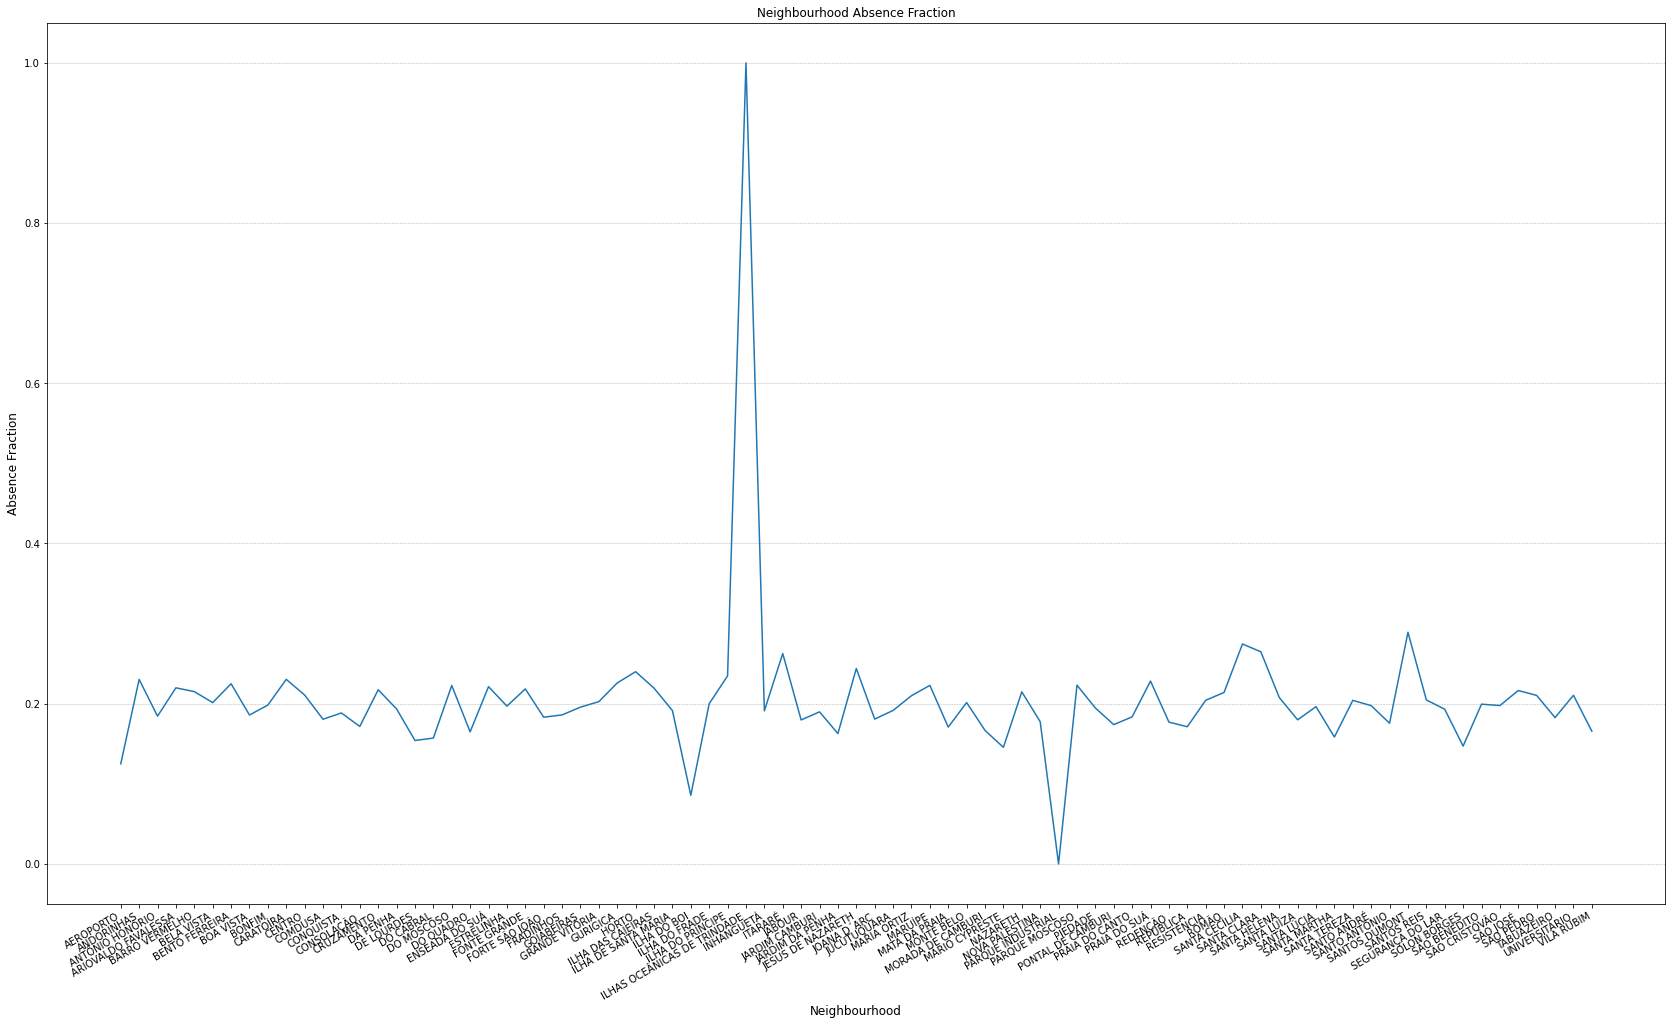

In [45]:
plt.plot(df_plot['Neighbourhood'],df_plot['Absence Fraction'])
plt.gcf().autofmt_xdate()
plt.xlabel('Neighbourhood',fontsize = 'large')
plt.ylabel('Absence Fraction',fontsize = 'large')
plt.title('Neighbourhood Absence Fraction',fontsize = 'large')
plt.grid(axis = 'y',linestyle = '--',linewidth = 0.5);

The absence fraction shows change from the overall absence fraction (0.2) with changing the location. Thus, the `Neighbourhood` can be considered a factor that affects the absence chance.

<a id='var_9'></a>
### 3.9 Age Effect
The `Age` represent a numerical discrete variable in this data set. Four function will be first defined.<br>
The first one grahpically shows the general distribution of each age group where each discrete value represent a group.<br>
The second function represent the same concept of distribution (year Vs number of patients) but for absent and not absenct patients. The two distributions will be plotted on top of each others. It should be noted that these are not stacked bars <br>
The third function will represent the same info in the previous function graph but using the statistical metrics.<br>
The fourth one plot the absence fraction for each year of age as a line plot 

In [46]:
def general_dist(field_name,df,x_title,y_title,chart_title):
    x = df[field_name].value_counts()
    rcParams['figure.figsize']=18,10
    plt.bar(x.index, x.values,alpha = 0.8)
    plt.minorticks_on()
    plt.grid(which = 'both',axis = 'y',linestyle = '--',linewidth = 0.5)
    plt.xlabel(x_title,fontsize = 'x-large')
    plt.ylabel(y_title,fontsize = 'x-large')
    plt.title(chart_title,fontsize = 'x-large');

def absence_dist (field_name,df,x_title,y_title,chart_title):
    df_attend = df[df['Absence']==0]
    df_absence = df[df['Absence']==1]
    attend = df_attend[field_name].value_counts()
    absence = df_absence[field_name].value_counts()
    rcParams['figure.figsize']=18,10
    plt.bar(attend.index, attend.values,label='Not absent',color = 'blue',alpha = 0.75)
    plt.bar(absence.index, absence.values,label='Absent',color = 'red',alpha = 0.75)
    plt.minorticks_on()
    plt.grid(which = 'both',axis = 'y',linestyle = '--',linewidth = 0.5)
    plt.xlabel(x_title,fontsize = 'x-large')
    plt.ylabel(y_title,fontsize = 'x-large')
    plt.title(chart_title,fontsize = 'x-large')
    plt.legend();

def get_stats(field_name,df):
    df_attend = df[df['Absence']==0][[field_name,'AppointmentId']]
    df_absence = df[df['Absence']==1][[field_name,'AppointmentId']]
    df_attend = df_attend.rename(columns={field_name:('Not Abscent '+field_name)})
    df_absence = df_absence.rename(columns={field_name:('Abscent '+field_name)})
    df_new = pd.merge(df_attend,df_absence,on = 'AppointmentId',how = 'outer')
    df_new = df_new.drop(columns=['AppointmentId'])
    return df_new.describe()

def absence_fraction_line(field_name,df,x_title,y_title,chart_title):
    df_new = df.groupby(field_name,as_index = False)['Absence'].mean()
    df_new = df_new.rename(columns = {'Absence':'Absence Fraction'})
    rcParams['figure.figsize']=18,10
    plt.plot(df_new[field_name],df_new['Absence Fraction']);
    plt.minorticks_on()
    plt.grid(which = 'both',axis = 'y',linestyle = '--',linewidth = 0.5)
    plt.xlabel(x_title,fontsize = 'x-large')
    plt.ylabel(y_title,fontsize = 'x-large')
    plt.title(chart_title,fontsize = 'x-large');


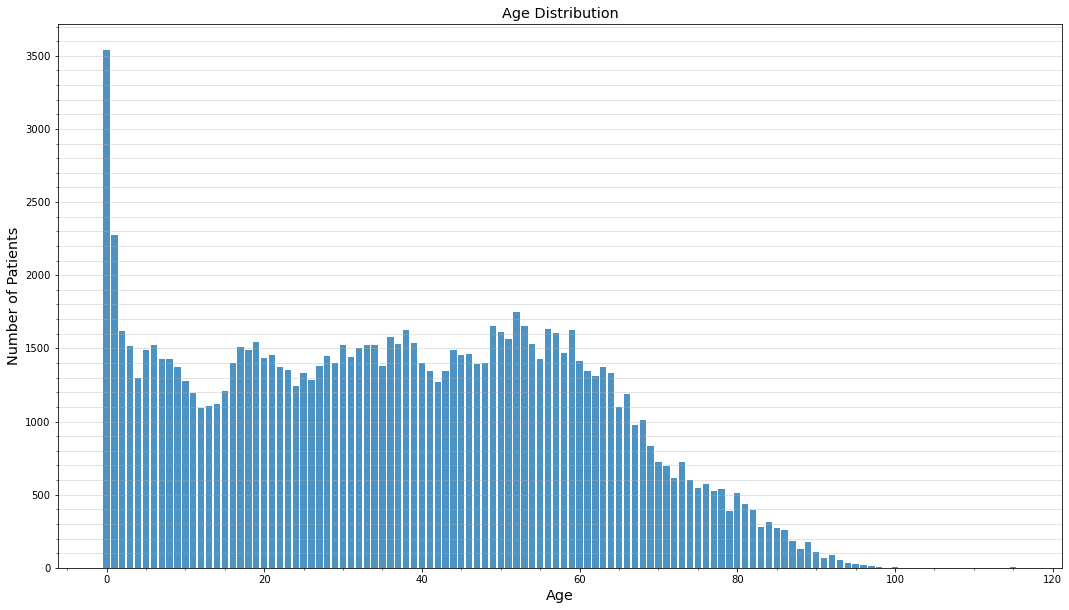

In [47]:
general_dist('Age',df_clean,'Age','Number of Patients','Age Distribution')

The plot shows the distribution of age in the data set. It is obvious that new born with age less than a year is the most frequent age group.

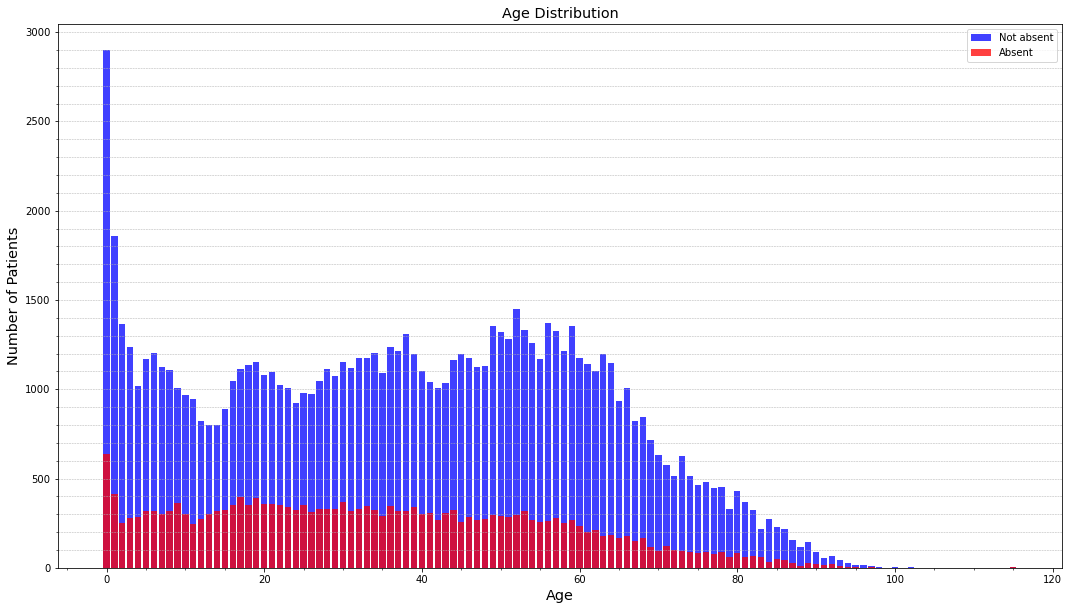

In [48]:
absence_dist('Age',df_clean,'Age','Number of Patients','Age Distribution')

Inspecting the distribution of age between absent and non-abscent patients show that ,in general, both of the two groups show similar distribution

In [49]:
get_stats('Age',df_clean)

,Not Abscent Age,Abscent Age
count,88207.000000,22314.000000
mean,37.790504,34.317872
std,23.338645,21.965009
min,0.000000,0.000000
25%,18.000000,16.000000
50%,38.000000,33.000000
75%,56.000000,51.000000
max,115.000000,115.000000


The statistical parameters comparison of age between absent and non_absent patients shows that Not Absent Age has a higher average than the Absent Age and higher standard deviation. The other statistical parameters confirms the same observation of higher ages for not absent patient compared with absent ones.

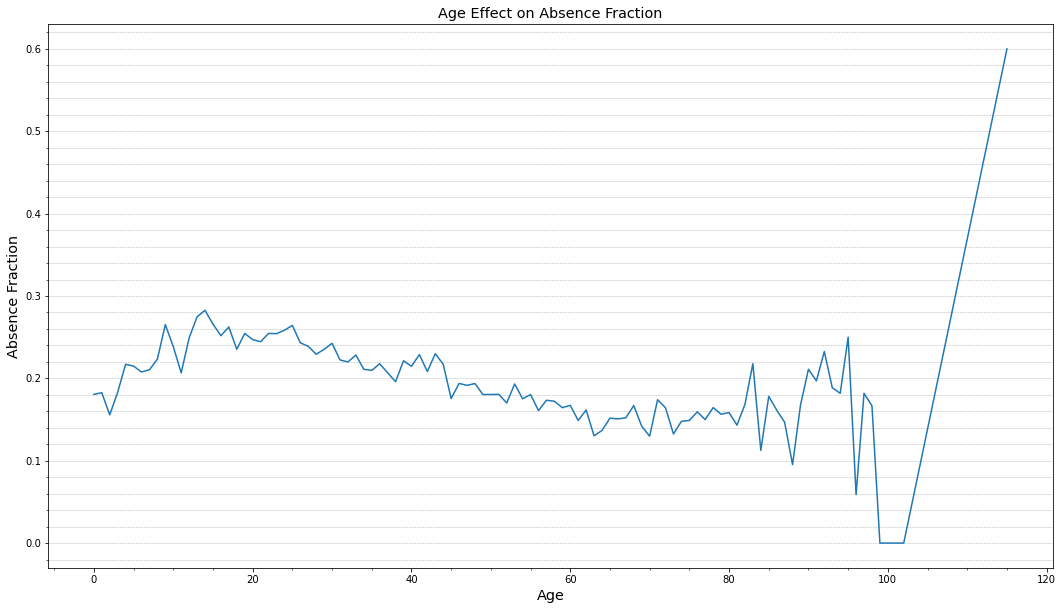

In [50]:
absence_fraction_line('Age',df_clean,'Age','Absence Fraction','Age Effect on Absence Fraction')

The line chart shows that with increasing the age there is a general increase in the absence fraction above the overall absence fraction till age of 40. After 40, a general reduction in the absence fraction is observed till age of 80, then a general increase in the absence fraction is observed again. Thus, `Age` can be considered a factor to control the prediction of absence chance.

<a id='var_10'></a>
### 3.10 Wait Period Effect
The previous analysis performed on `Age` variable will be repeated for the `WaitPeriod`

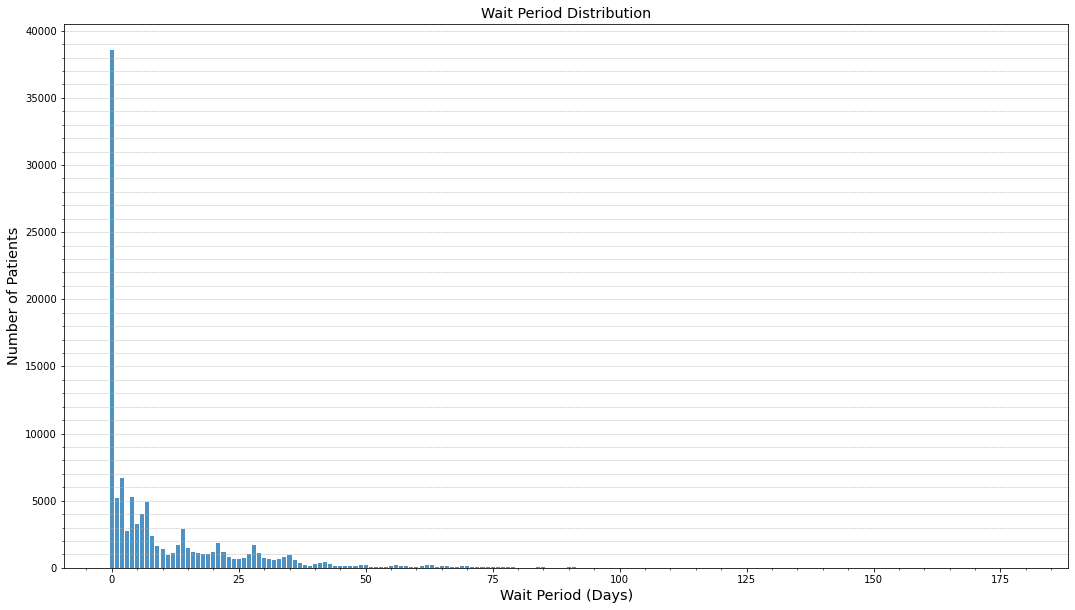

In [51]:
general_dist('WaitPeriod',df_clean,'Wait Period (Days)','Number of Patients','Wait Period Distribution')

In general, the appointment are scheduled in the same day the patient requested an appointment.

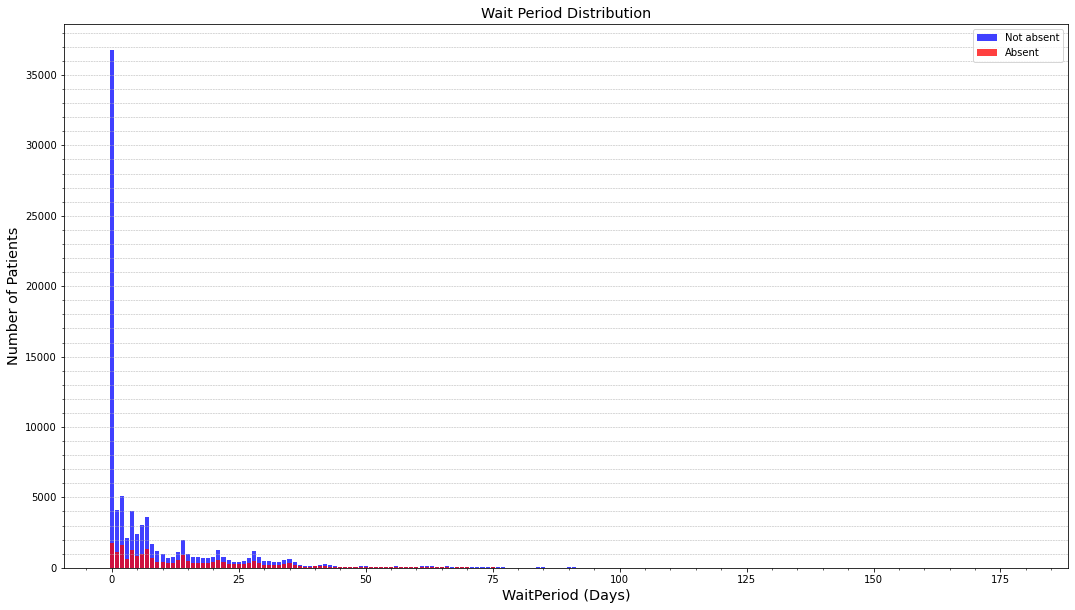

In [52]:
absence_dist('WaitPeriod',df_clean,'WaitPeriod (Days)','Number of Patients','Wait Period Distribution')

Patients who miss or don't miss their appointment shows similar distribution of wait period.

In [53]:
get_stats('WaitPeriod',df_clean)

,Not Abscent WaitPeriod,Abscent WaitPeriod
count,88207.000000,22314.000000
mean,8.754759,15.835484
std,14.550450,16.605600
min,0.000000,0.000000
25%,0.000000,4.000000
50%,2.000000,11.000000
75%,12.000000,23.000000
max,179.000000,179.000000


The people who tends to miss their appointment has higher mean of wait period and higher wait periods in general

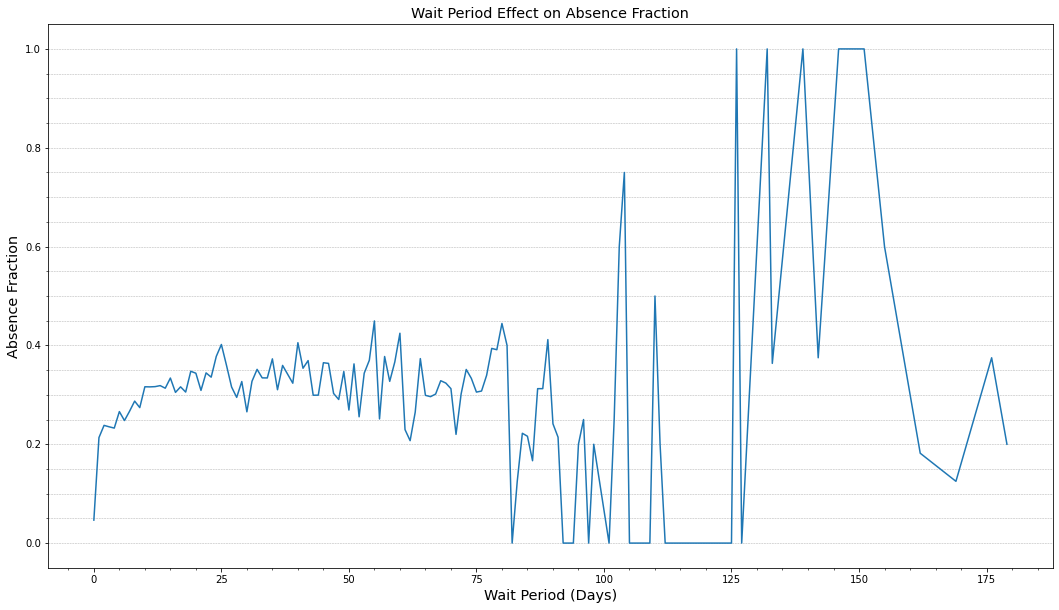

In [54]:
absence_fraction_line('WaitPeriod',df_clean,'Wait Period (Days)','Absence Fraction','Wait Period Effect on Absence Fraction')

In general, increasing the wait period show a general increase in the absence fraction. Thus, considering the `WaitPeriod` as a factor in abscence chance prediction is logic.

<a id='conclusions'></a>
## 4 Conclusions

There are 10 different variables are investigated to check their relationship with the absence probability. First, the overall absence ratio was calculated. Then, the effect of changing these variables on the absence fraction was investigated. <br>
It was concluded that 
- Brasilian program enrollment
- Hypertension diagnosis
- Diabetes diagnosis
- Reminder SMS receival
- Handicap degree
- Neighbourhood 
- Patient Age
- Wait period

can be considered as effecting factor on absence probability. This analysis is limited as it didn't consider the inter-relationship between the above factors and this inter-relationship effect on the absence fraction. In other words, changing the age has shown a change in absence fraction, but this effect can't be justified only by age change. As, with age change, other variables change also. The change of the absence fraction is a contribution of all the changing variables with age group change. To give an evaluation of the inter-relationship between the above variables a correlation coefficient will be calculated.

In [55]:
df_correlation = df_clean[['Scholarship','Hypertension','Diabetes','SMS_received','Age','WaitPeriod']]
df_correlation.corr()

,Scholarship,Hypertension,Diabetes,SMS_received,Age,WaitPeriod
Scholarship,1.000000,-0.019738,-0.024899,0.001182,-0.092469,-0.030435
Hypertension,-0.019738,1.000000,0.433082,-0.006285,0.504599,-0.017236
Diabetes,-0.024899,0.433082,1.000000,-0.014561,0.292398,-0.027200
SMS_received,0.001182,-0.006285,-0.014561,1.000000,0.012629,0.398128
Age,-0.092469,0.504599,0.292398,0.012629,1.000000,0.034813
WaitPeriod,-0.030435,-0.017236,-0.027200,0.398128,0.034813,1.000000


There is a positive correlaion between `Hypertension`, `Diabetes` and `Age`. <br>
There is a positive correlation between `WaitPeriod` and `SMS_received`. This correlation explains why receiving SMS increases the absence fraction. As receiving the SMS is correlated with long wait period which shows a positive correlation with absence fraction.<br>